In [1]:
import pandas as pd
from matplotlib import rcParams 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('fivethirtyeight')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('Default_Fin.csv')
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [50]:
output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mode', 'Mean', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurt'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mode().values[0], df[col].mean(), df[col].min(), df[col].quantile(.25), df[col].median(), df[col].quantile(.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]
    else:
        output_df.loc[col] 

output_df

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
employed,10000,0,2,int64,True,1,0.705600,0,0.00,1.00,1.00,1,0.455795,-0.902340,-1.186020
bank_balance,10000,0,9227,float64,True,0.0,10024.498524,0.0,5780.79,9883.62,13995.66,31851.84,5804.579486,0.246065,-0.354723
annual_salary,10000,0,9989,float64,True,142868.16,402203.782224,9263.64,256085.52,414631.74,525692.76,882650.76,160039.674988,0.073341,-0.899498
defaulted,10000,0,2,int64,True,0,0.033300,0,0.00,0.00,0.00,1,0.179428,5.203134,25.077614


No null values observed. No need to change data type.

In [4]:
# Drop Index column as deemed not necessary

df.drop(columns='Index', inplace=True)
df

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [5]:
# Rename columns

df.rename(columns={'Employed':'employed', 'Bank Balance':'bank_balance', 'Annual Salary':'annual_salary', 'Defaulted?':'defaulted'}, inplace=True)
df

,employed,bank_balance,annual_salary,defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


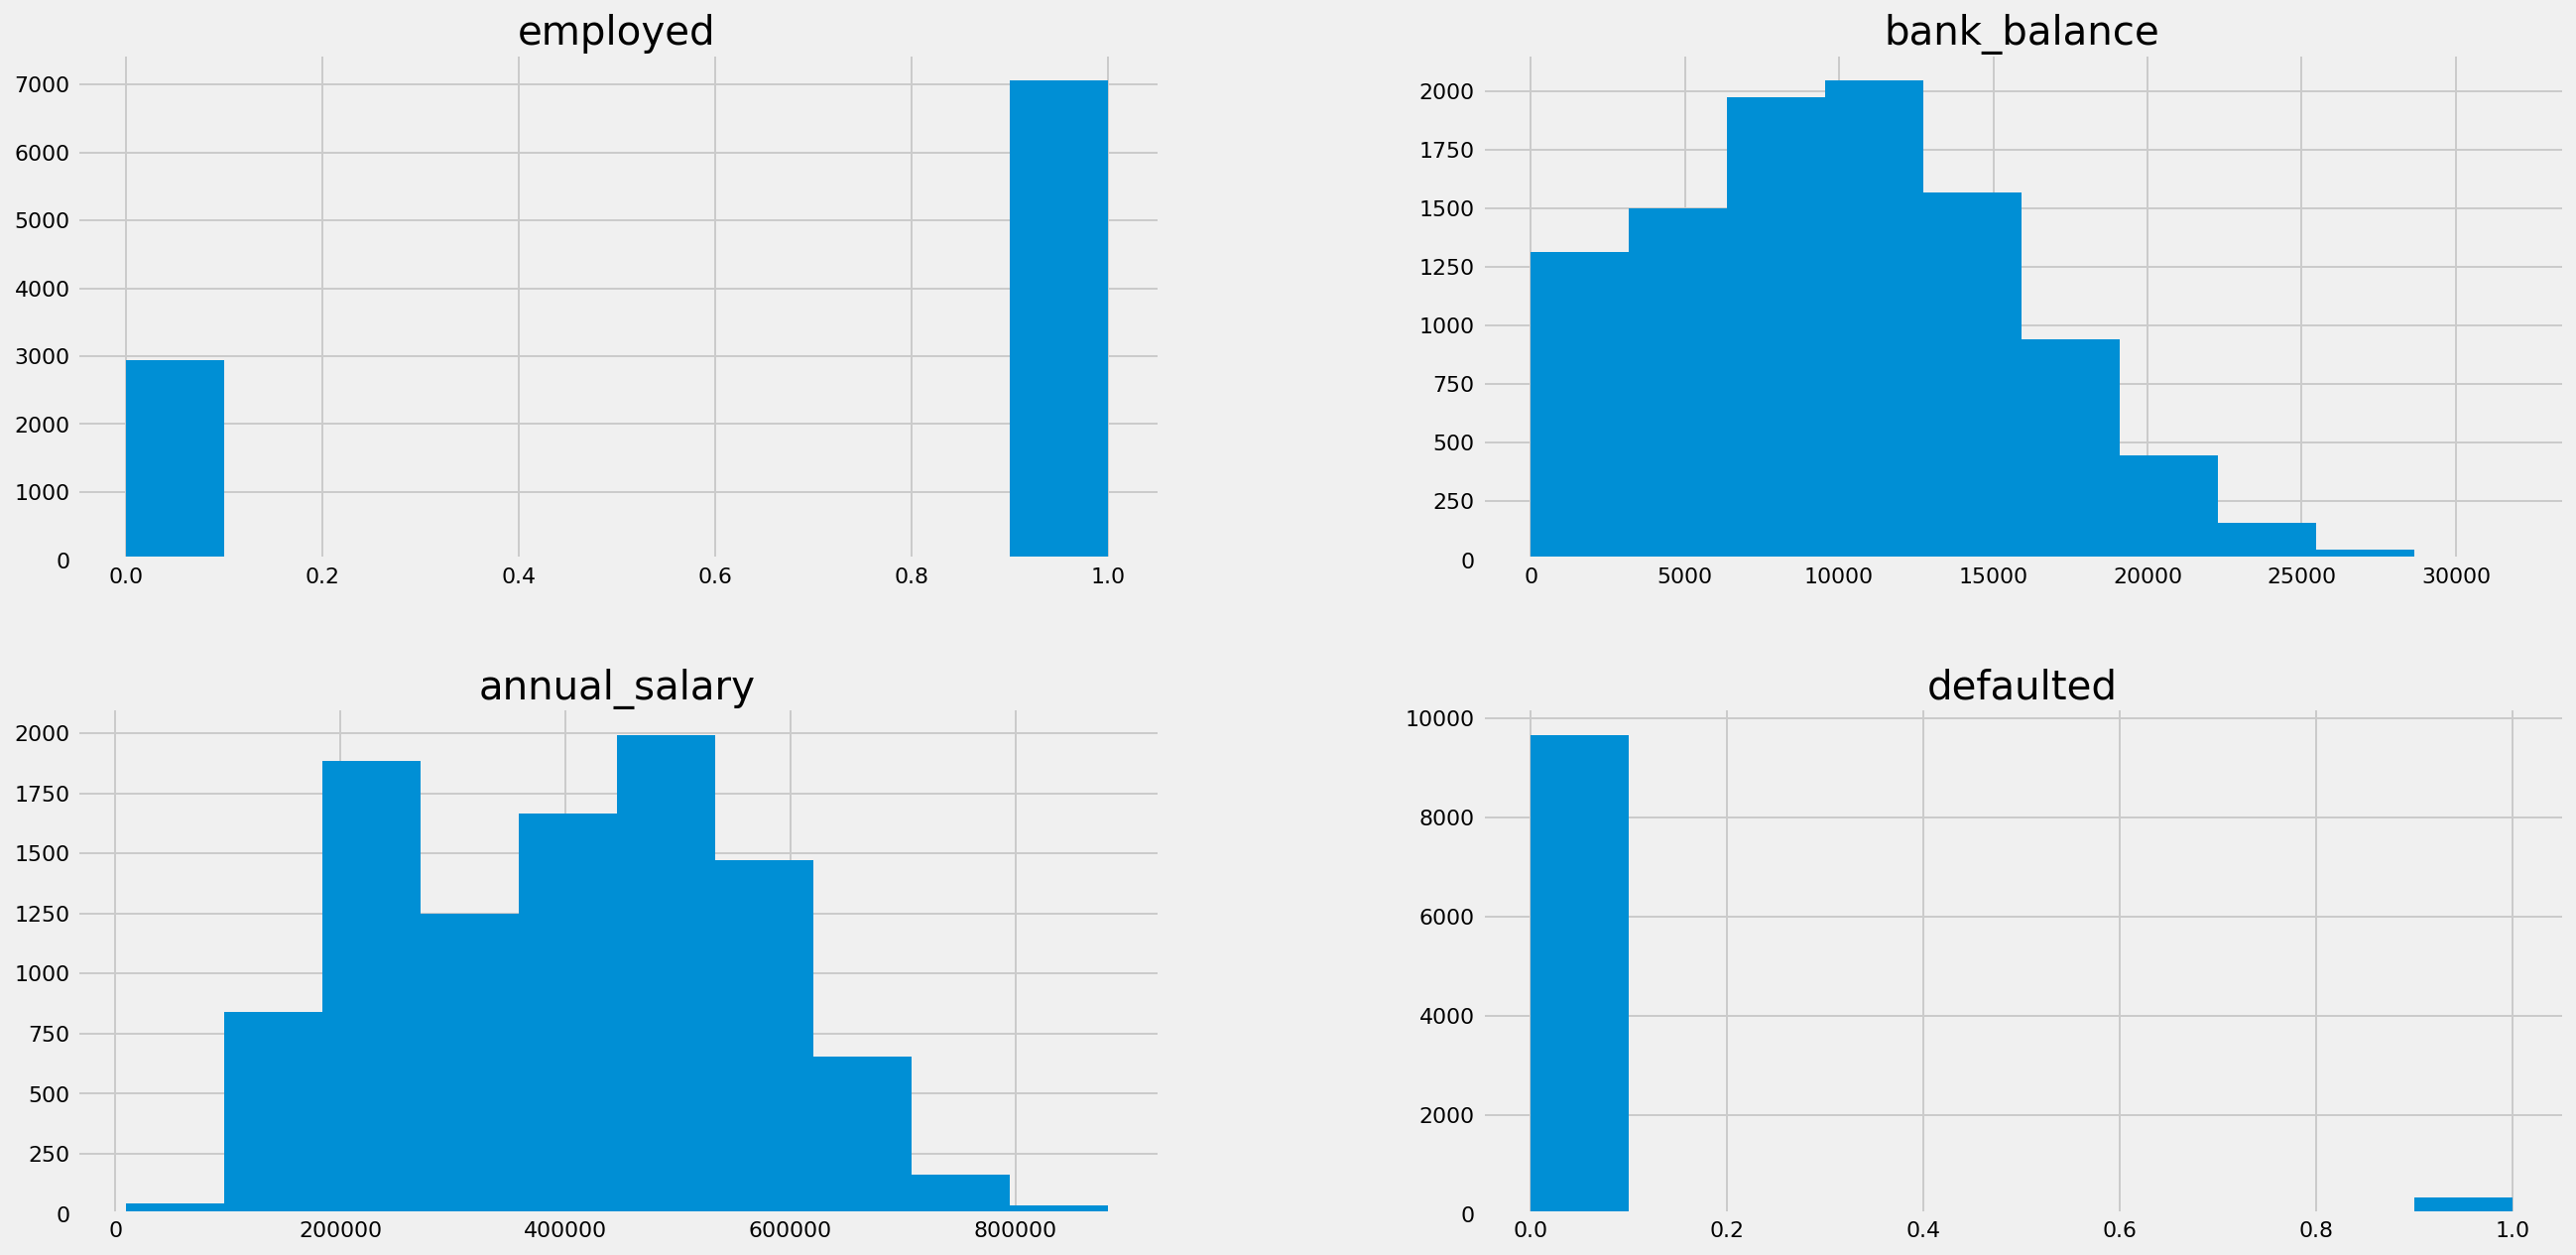

In [6]:
# Overview of all data in dataframe in visual form

df.hist(figsize=(20,10))
plt.show()

Can be seen from Histogram that bank balance is right skewed. And the number of defaulters is very imbalanced. Skewness is also calculated.

In [7]:
df.skew()

employed        -0.902340
bank_balance     0.246065
annual_salary    0.073341
defaulted        5.203134
dtype: float64

The percentage of defaulters and employed customers can be visualised with a pie chart.

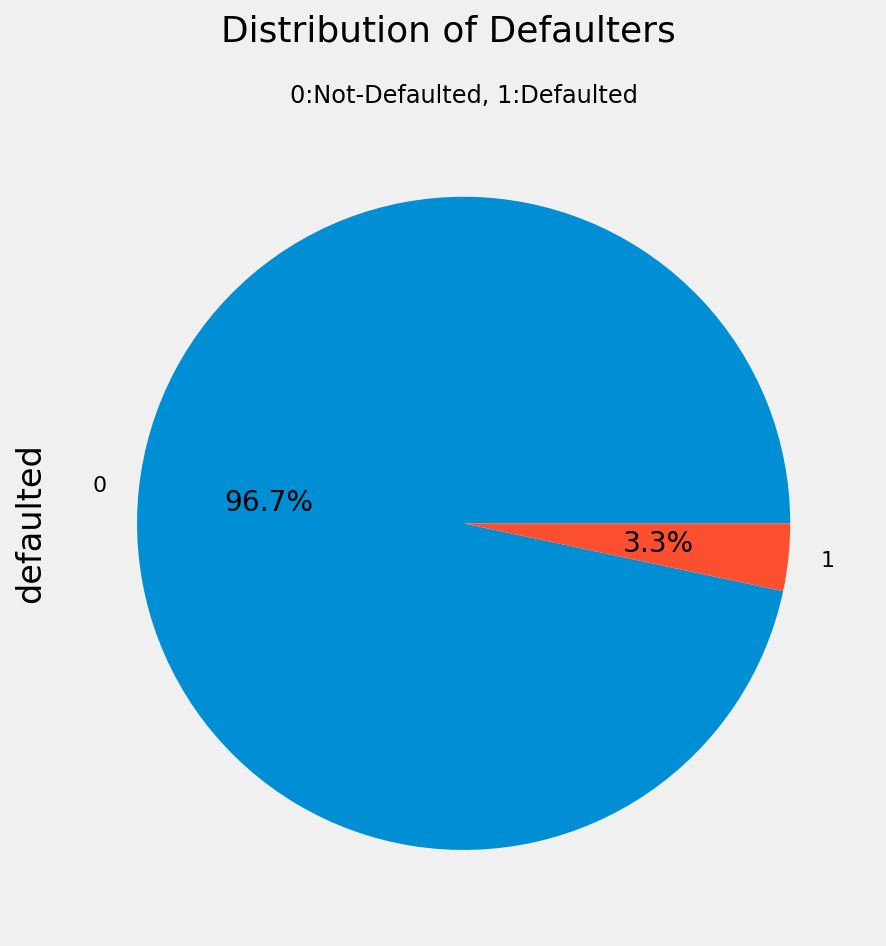

In [8]:
plt.figure(figsize=(7,7))
ax = df['defaulted'].value_counts().plot(kind='pie', autopct='%1.1f%%',)
plt.suptitle('Distribution of Defaulters', fontsize=18)
plt.title('0:Not-Defaulted, 1:Defaulted', fontsize=12)

plt.show()

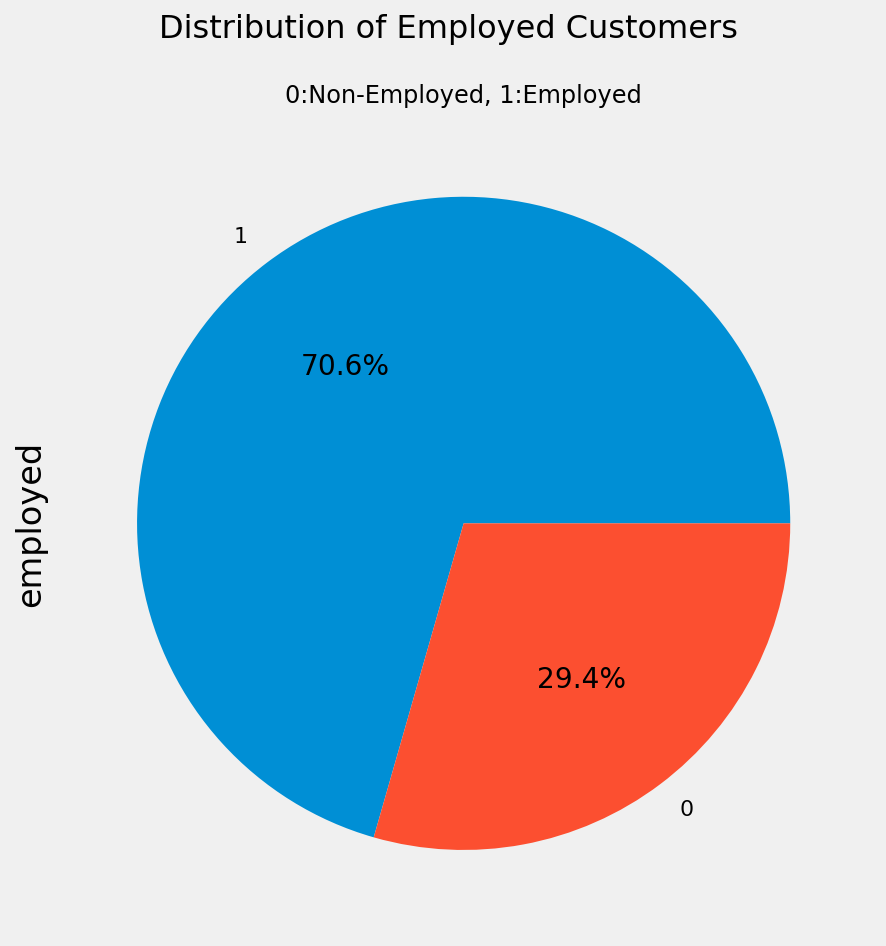

In [9]:
plt.figure(figsize=(7,7))
ax = df['employed'].value_counts().plot(kind='pie', autopct='%1.1f%%',)
plt.suptitle('Distribution of Employed Customers', fontsize=16)
plt.title('0:Non-Employed, 1:Employed', fontsize=12)
plt.show()

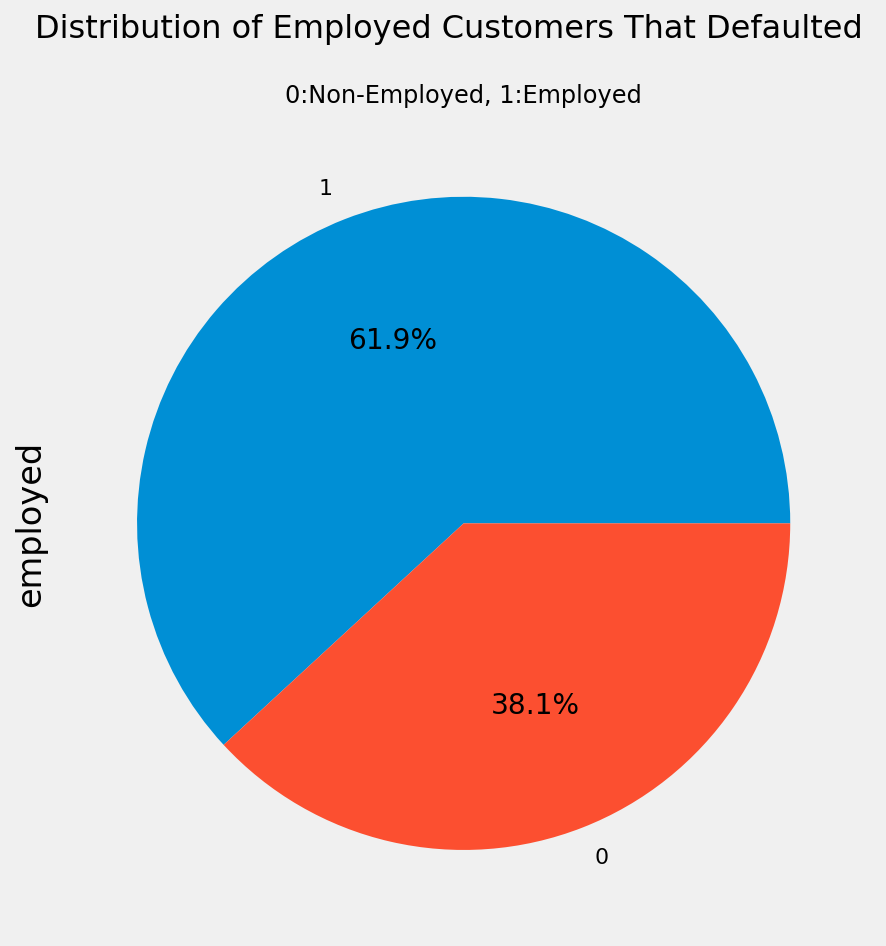

In [10]:
plt.figure(figsize=(7,7))
ax = df[df['defaulted']==1]['employed'].value_counts().plot(kind='pie', autopct='%1.1f%%',)
plt.suptitle('Distribution of Employed Customers That Defaulted', fontsize=16)
plt.title('0:Non-Employed, 1:Employed', fontsize=12)
plt.show()

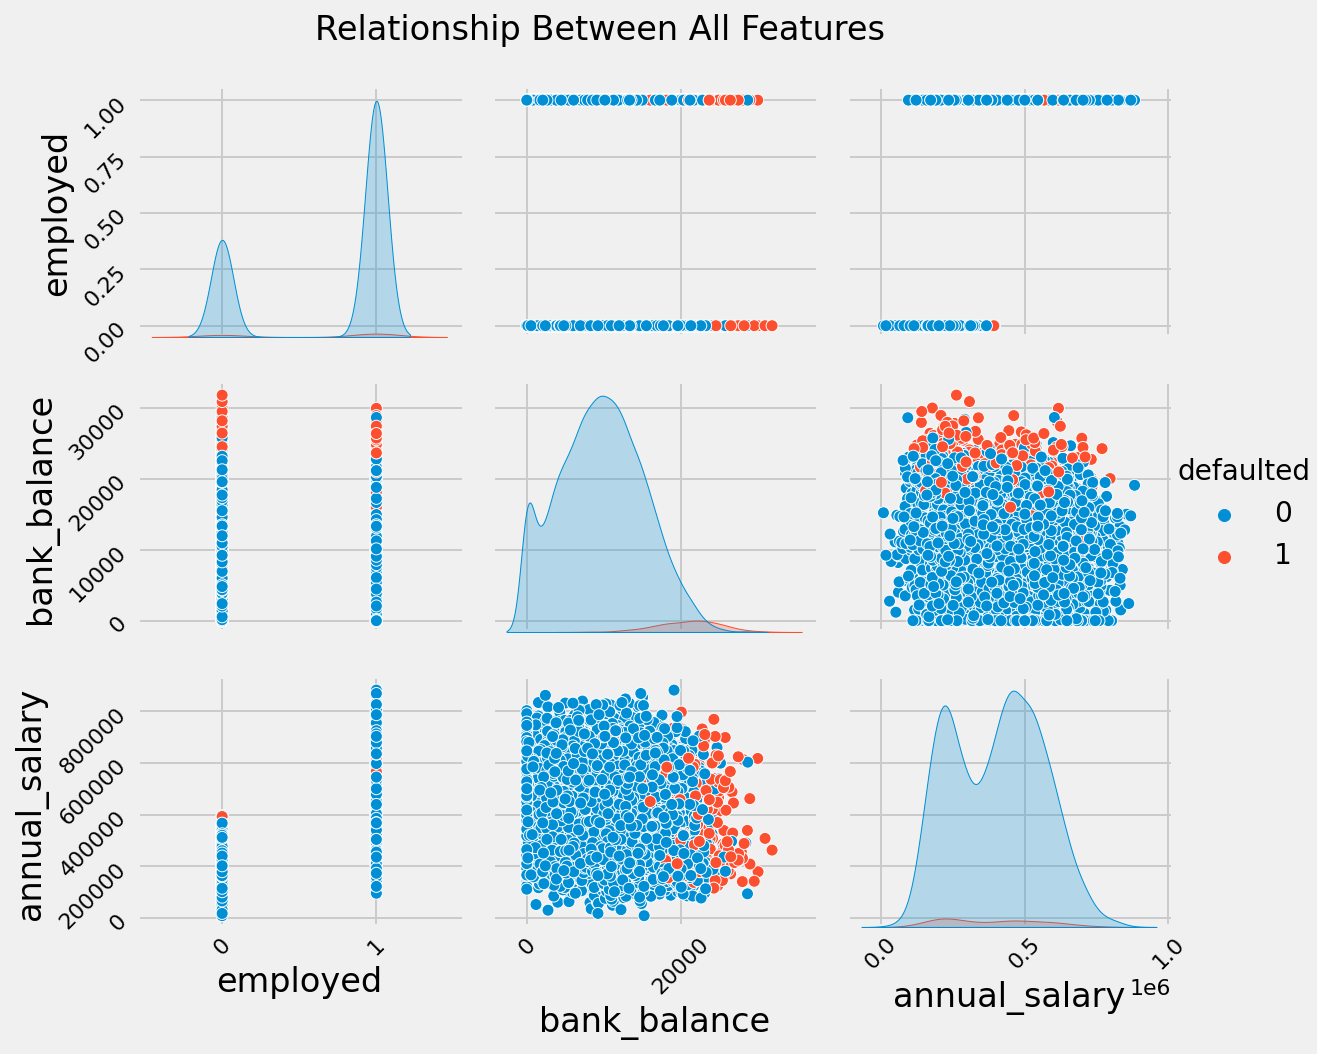

In [11]:
# Visualise the relationship between all features in dataframe

g = sns.pairplot(data=df, hue="defaulted",)
for ax in g.axes.flatten():
    ax.tick_params(rotation = 45)
plt.suptitle('Relationship Between All Features')
plt.tight_layout()
g._legend.set_bbox_to_anchor((1.08, 0.5))
plt.show()

There seem to be some correlation between default status and bank balance.

We can run a correlation analysis to confirm if there are any high correlation between the different features.

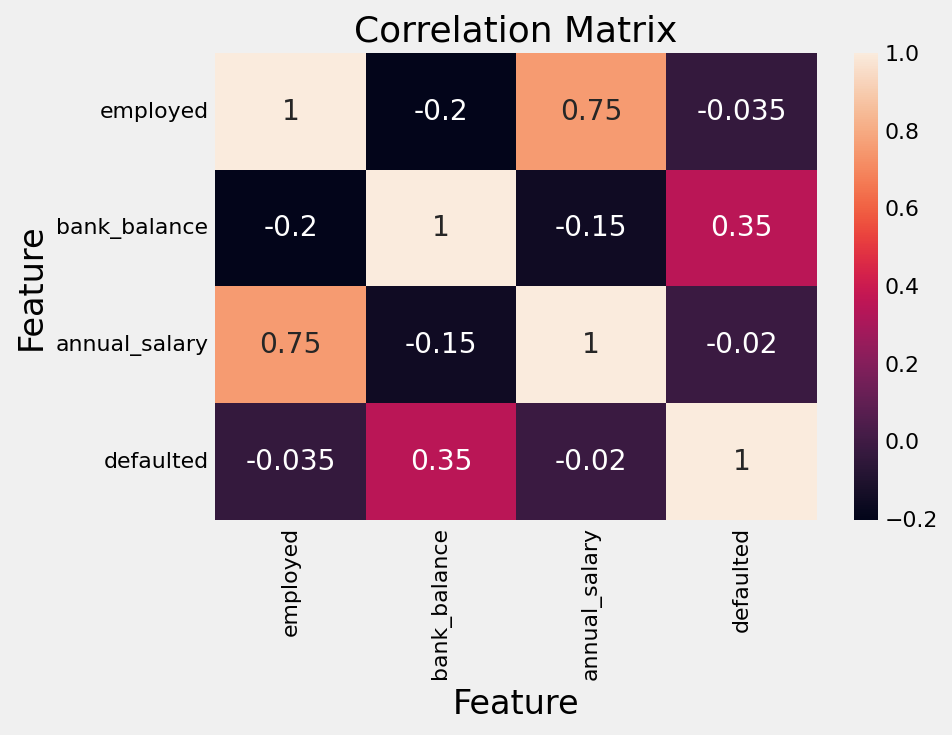

In [12]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix', fontsize=18)
plt.ylabel('Feature')
plt.xlabel('Feature')
plt.show()

Only annual salary and employment status is highly positively correlated (0.75), which makes sense. Default status have some positive correlation with bank balance (0.35), showing that the ones getting defaulted have higher bank balance.

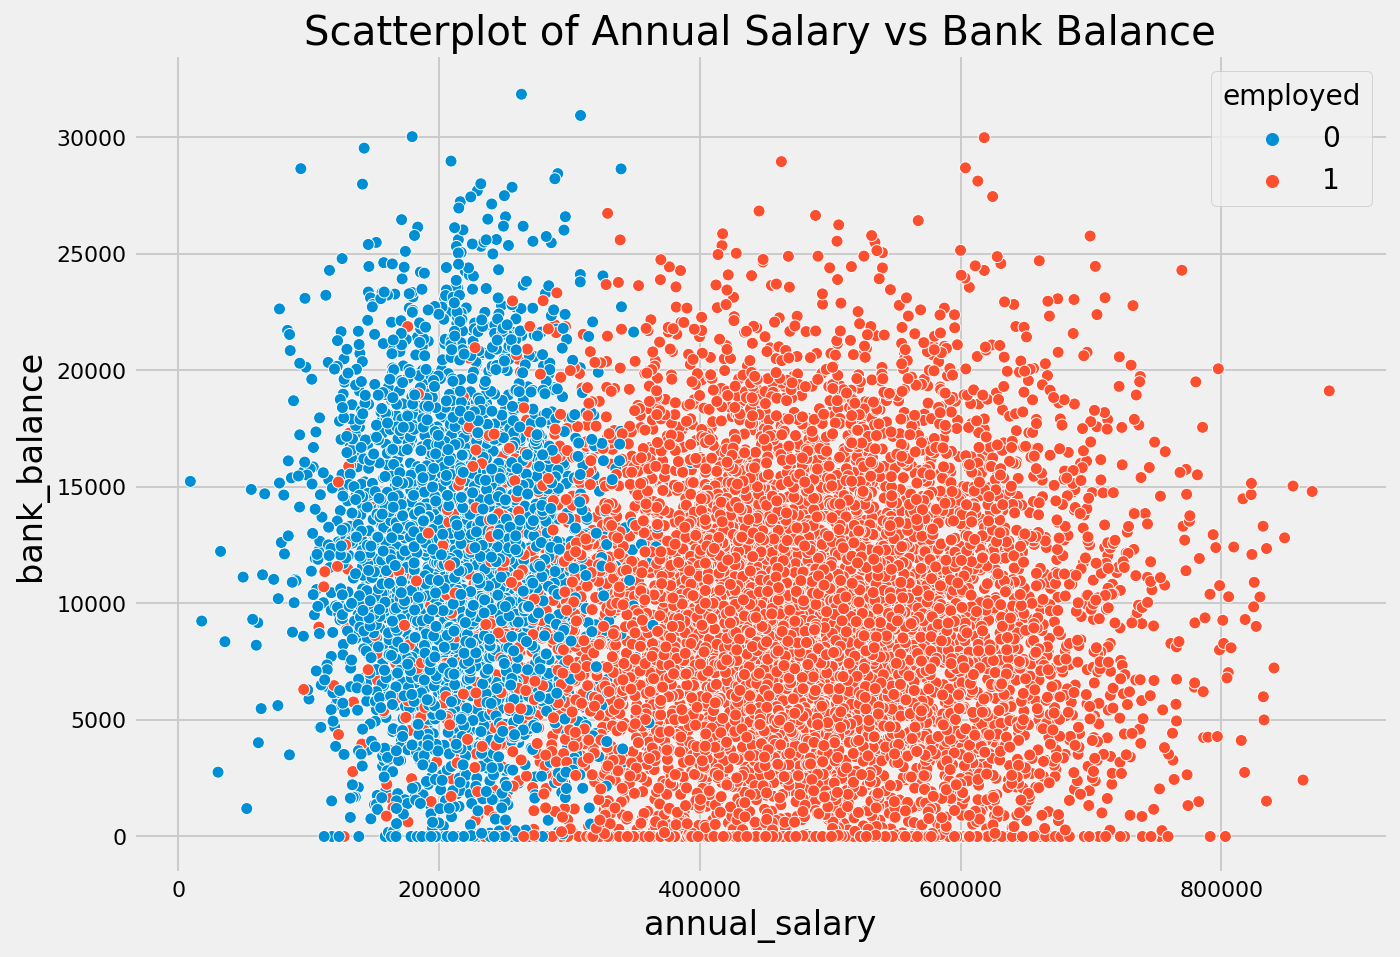

In [13]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='annual_salary', y='bank_balance', data=df, hue='employed')
plt.title("Scatterplot of Annual Salary vs Bank Balance")
plt.show()

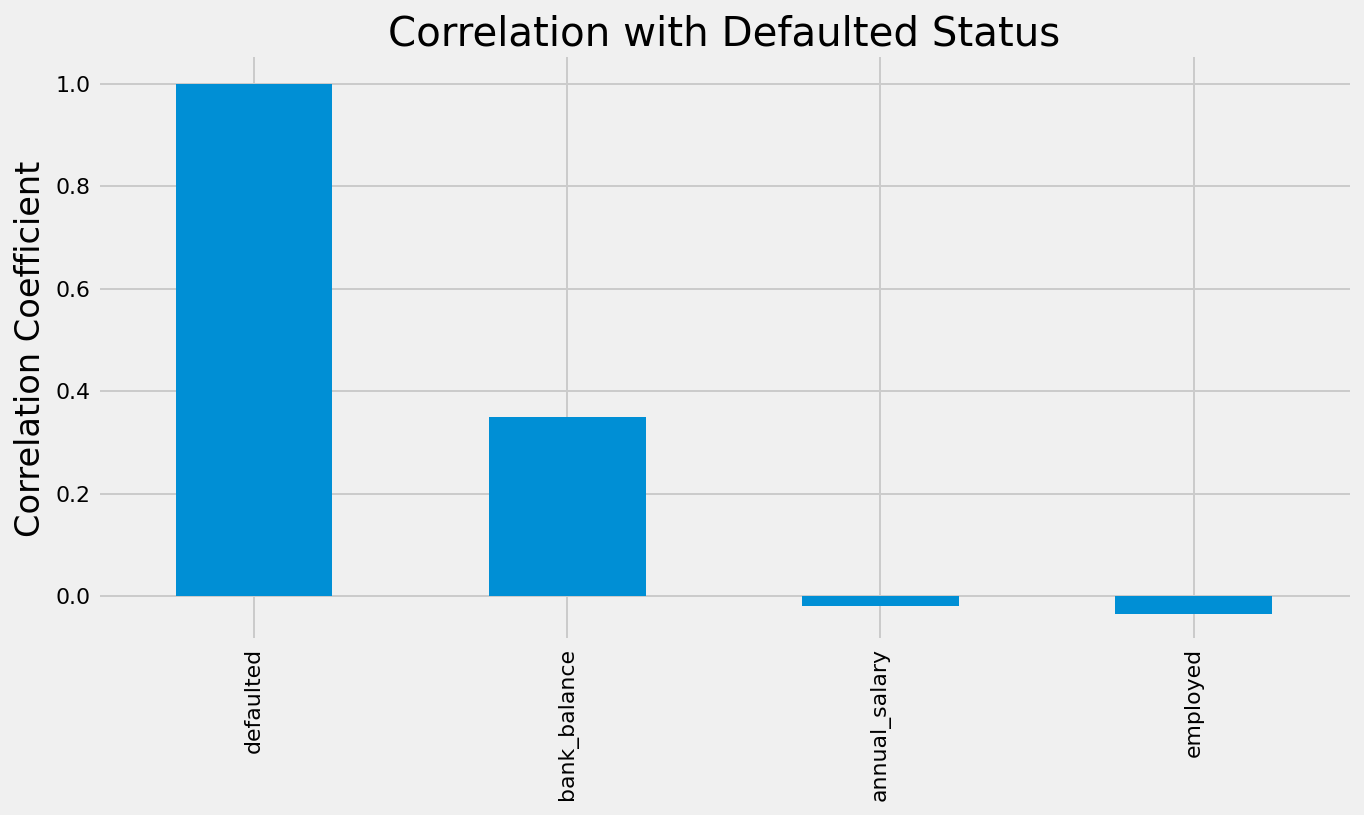

In [14]:
plt.figure(figsize=(10,5))
df.corr()['defaulted'].sort_values(ascending=False).plot(kind='bar')
plt.title("Correlation with Defaulted Status")
plt.ylabel('Correlation Coefficient')

plt.show()

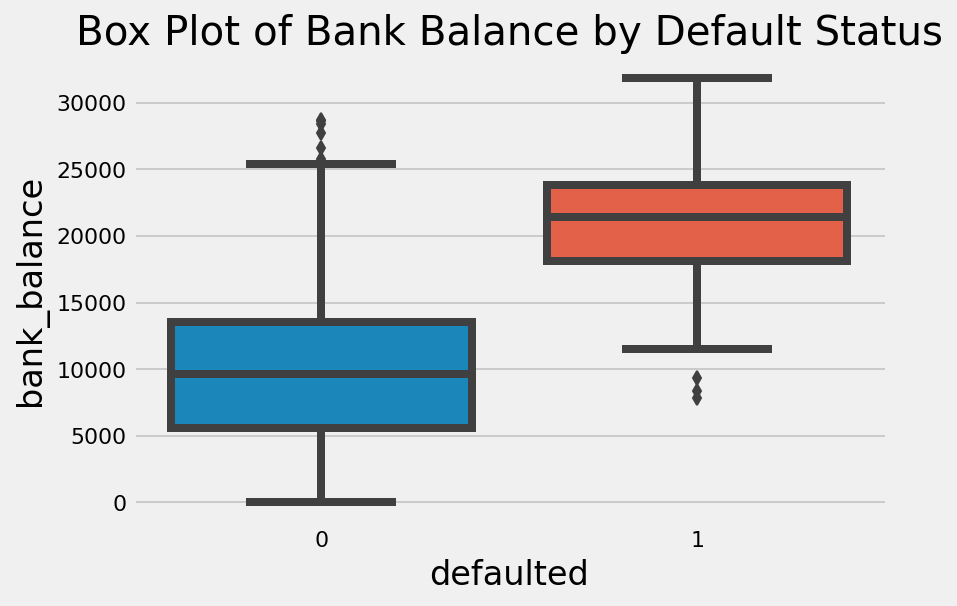

In [15]:
ax = sns.boxplot(x="defaulted", y="bank_balance", data=df)
plt.title('Box Plot of Bank Balance by Default Status')
plt.show()

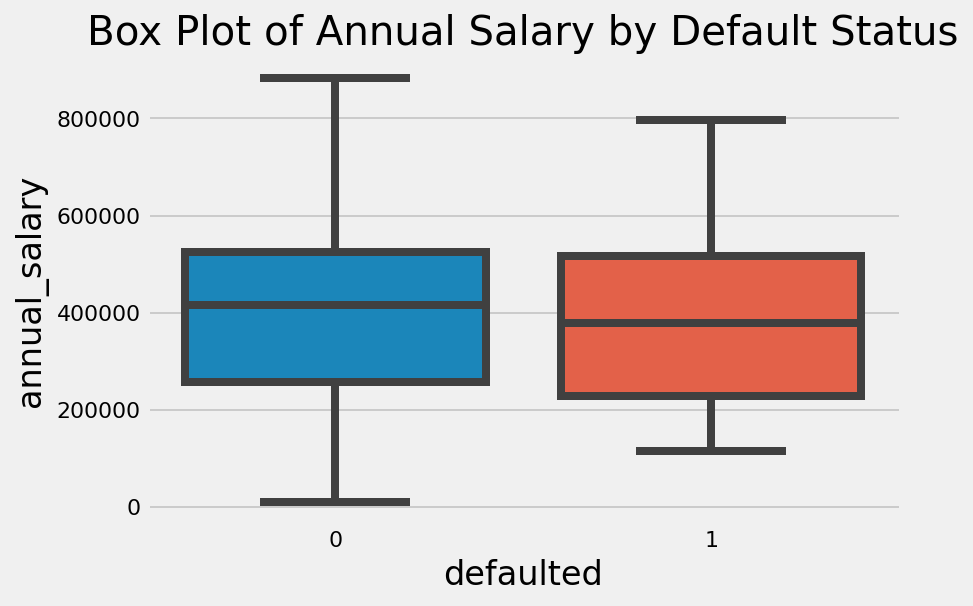

In [16]:
ax = sns.boxplot(x="defaulted", y="annual_salary", data=df)
plt.title('Box Plot of Annual Salary by Default Status')
plt.show()

-----

# Summary of EDA

- There is a moderate level of correlation between the default status and the bank balance.
- Annual salary is highly correlated with bank balance, however are not correlated to default status.
- Those that are getting defaulted are the ones with higher bank balance.
- Employment status does not affect default status.

-----

# Import necessary libraries for supervised machine learning

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay

In [18]:
# Define the target feature and other features

y = df['defaulted']
X = df.drop(['defaulted'], axis=1)

ExtraTreesRegressor is used for Feature Importance to describe which features are relevant.

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.0123389 , 0.66145927, 0.32620183])

<AxesSubplot:>

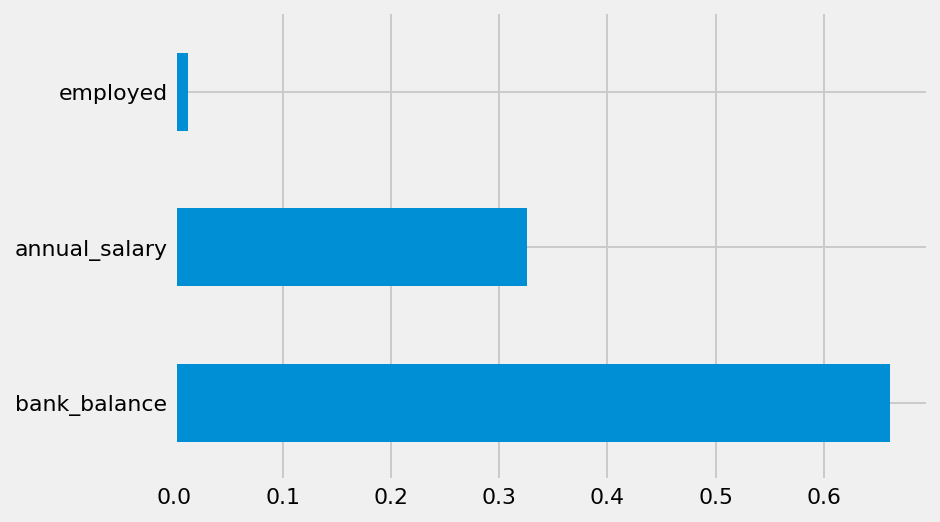

In [20]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

-----

# Model 1: k-nearest Neighbors algorithm

#### - Splitting data into training and testing sets

In [21]:
y = df['defaulted']
X = df.drop(['defaulted'], axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=89)

In [23]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(2500, 3)
(7500, 3)
(2500,)
(7500,)


In [24]:
# Finding the best n_neighbors value

error = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

best_k = error.index(min(error))+1

print("Minimum error:-",min(error),"at K =",best_k)

Minimum error:- 0.03 at K = 6


In [25]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [26]:
y_pred_train = knn.predict(X_train)
print("Accuracy check based on training set:")
print(accuracy_score(y_train, y_pred_train))

Accuracy check based on training set:
0.9706666666666667


In [27]:
y_pred = knn.predict(X_test)
print("Accuracy check based on testing set:")
print(accuracy_score(y_test, y_pred))

Accuracy check based on testing set:
0.97


### Evaluate performance of k-Nearest Neighbor

#### - Confusion Matrix

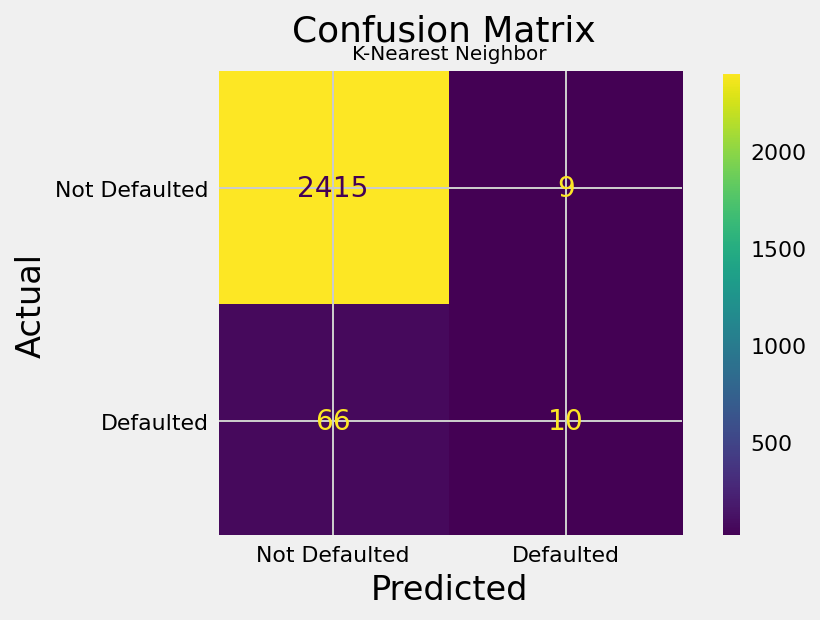

In [28]:
cm_knn = confusion_matrix(y_test, y_pred) 

ConfusionMatrixDisplay(cm_knn, display_labels=['Not Defaulted','Defaulted']).plot()

plt.suptitle('Confusion Matrix', fontsize=18)
plt.title('K-Nearest Neighbor', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### - Receiver operating characteristic curve (ROC)

AUC score:  0.7778383923918708


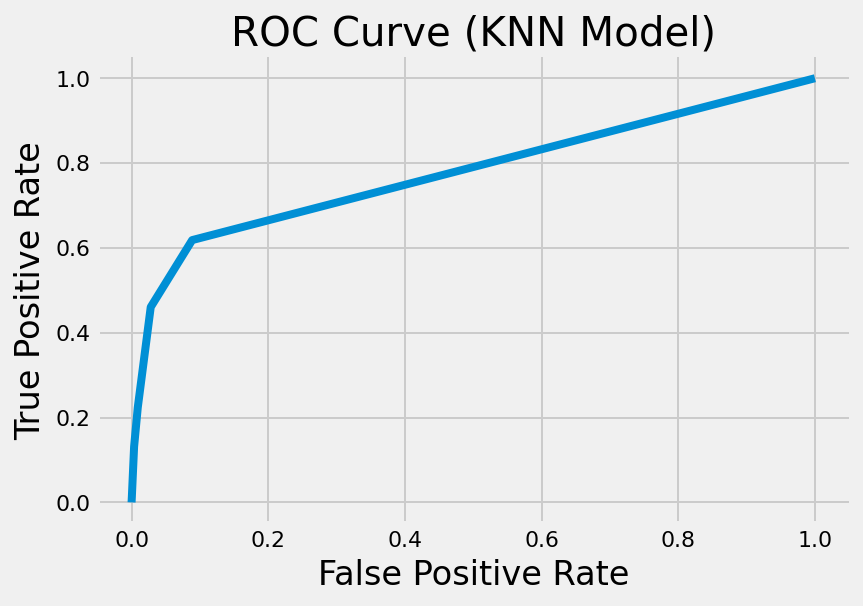

In [29]:
y_score = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve (KNN Model)')
print('AUC score: ',roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])) 

The K_Nearest Neighbor algorithm gives a 97.00% accuracy.

-----

# Model 2: Logistic Regression

In [30]:
y = df['defaulted']
X = df.drop(['defaulted'], axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=89)

In [32]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(2500, 3)
(7500, 3)
(2500,)
(7500,)


In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))                          

Accuracy:  0.9692


### Evaluate performance of Logistic Regression

#### - Confusion Matrix

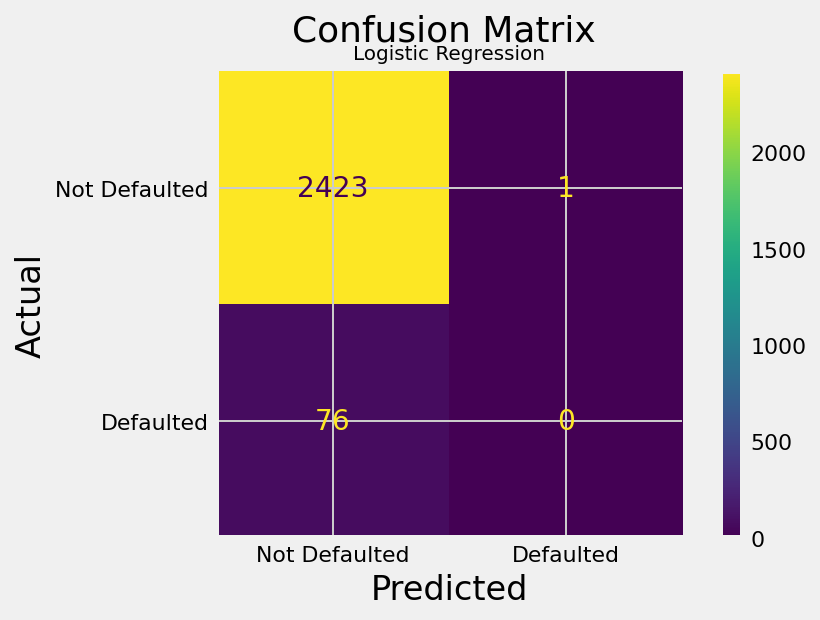

In [34]:
cm_log = confusion_matrix(y_test, y_pred) 

ConfusionMatrixDisplay(cm_log, display_labels=['Not Defaulted','Defaulted']).plot()

plt.suptitle('Confusion Matrix', fontsize=18)
plt.title('Logistic Regression', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### - Receiver operating characteristic curve (ROC)

AUC score:  0.7778383923918708


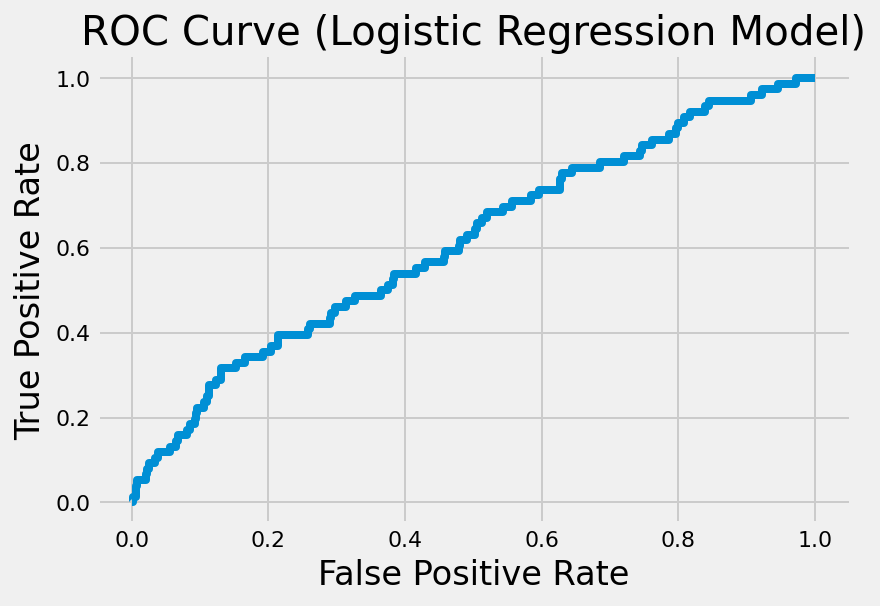

In [35]:
y_score = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve (Logistic Regression Model)')
print('AUC score: ',roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])) 

### Apply GridSearch to tune model

In [36]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
parameters = {
              'C': [0.01, 0.1, 1, 2, 10, 100],
              'penalty': ['l1', 'l2']
             }

scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(logreg, parameters, scoring=scorer, cv=10, n_jobs=-1)
grid_fit = grid_obj.fit(X_train, y_train)
pd.concat([pd.DataFrame(grid_fit.cv_results_["params"]),   
           pd.DataFrame(grid_fit.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).head()



C:\Users\nizam\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [   nan 0.9652    nan 0.9652    nan 0.9652    nan 0.9652    nan 0.9652
    nan 0.9652]
  warnings.warn(


,C,penalty,Accuracy
0,0.01,l1,NaN
1,0.01,l2,0.9652
2,0.10,l1,NaN
3,0.10,l2,0.9652
4,1.00,l1,NaN


In [38]:
best_logreg = grid_fit.best_estimator_

best_logreg = best_logreg.fit(X_train, y_train)

best_logreg_test_predictions = best_logreg.predict(X_test)

print(f"Accuracy score with best param(s): {accuracy_score(y_test,best_logreg_test_predictions)}")

Accuracy score with best param(s): 0.9692


In [39]:
best_logreg.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

The Logistic Regression algorithm gives a 96.92% accuracy.

-----

# Model 3: Decision Tree Classifier

In [40]:
y = df['defaulted']
X = df.drop(['defaulted'], axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=89)

In [42]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(2500, 3)
(7500, 3)
(2500,)
(7500,)


In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")

Accuracy Score: 0.9548


### Evaluate performance of Decision Tree Model

#### - Confusion Matrix

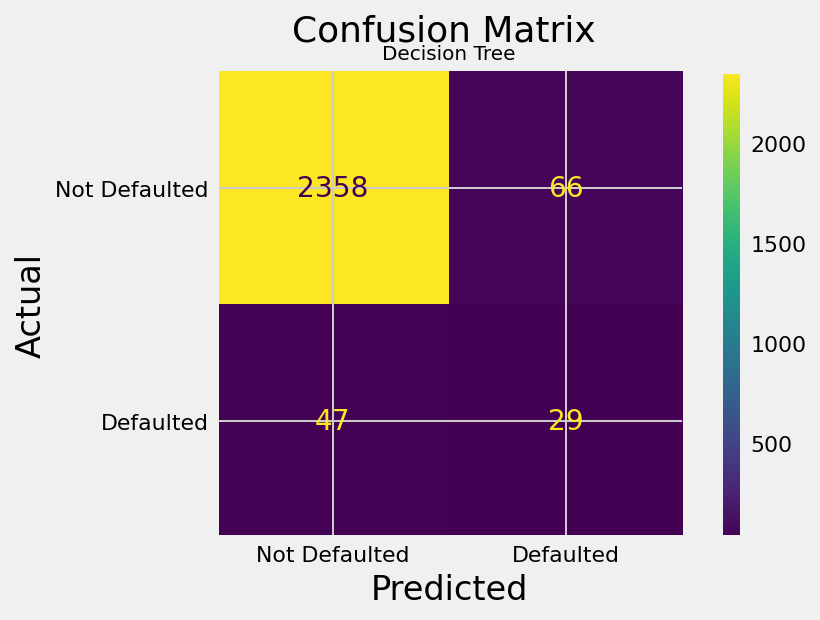

In [44]:
cm_dt = confusion_matrix(y_test, y_pred) 

ConfusionMatrixDisplay(cm_dt, display_labels=['Not Defaulted','Defaulted']).plot()

plt.suptitle('Confusion Matrix', fontsize=18)
plt.title('Decision Tree', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### - Receiver operating characteristic curve (ROC)

AUC score:  0.7778383923918708


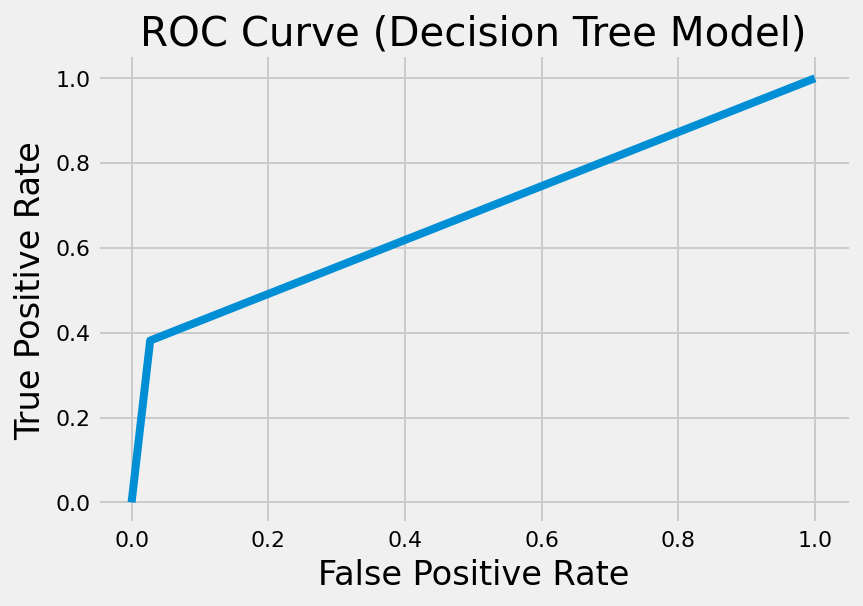

In [45]:
y_score = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve (Decision Tree Model)')
print('AUC score: ',roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])) 

### Apply GridSearch to tune model

In [46]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [47]:
parameters = {
              'max_depth':[1, 2, 3, 4, 5, 6],
              'min_samples_leaf':[2, 3, 4], 
              'min_samples_split':[10, 20, 30]
             }

scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(dt, parameters, scoring=scorer, cv=10, n_jobs=-1)
grid_fit = grid_obj.fit(X_train, y_train)
pd.concat([pd.DataFrame(grid_fit.cv_results_["params"]),   
           pd.DataFrame(grid_fit.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).head()



,max_depth,min_samples_leaf,min_samples_split,Accuracy
0,1,2,10,0.969333
1,1,2,20,0.969333
2,1,2,30,0.969333
3,1,3,10,0.969333
4,1,3,20,0.969333


In [48]:
best_dt = grid_fit.best_estimator_

best_dt = best_dt.fit(X_train, y_train)

best_dt_test_predictions = best_dt.predict(X_test)

print(f"Accuracy score with best param(s): {accuracy_score(y_test,best_dt_test_predictions)}")

Accuracy score with best param(s): 0.9736


In [49]:
best_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

The Logistic Regression algorithm gives a 97.36% accuracy.

-----

# Summary

### Observations
- Applied 3 algorithm models to predict if a new customer will be a loan defaulter (KNN algorithm, Logistic Regression and Decision Tree Classifier)

- All 3 models able to give a similar accuracy score of ~97%, with Decision Tree Classifier being the highest at 97.36% after tuning with GridSearchCV, but there is also a higher amount of false positives in this model compared to the other models.
- All 3 models also give the same AOC score.
- However, majority of the true predictions are made relating to people not defaulting which is the opposite of our purpose creating the models.
- All models need to be run with more datasets to confirm the effectiveness of these models to predict chances of new customer defaulting.
- The relatively low correlation between the features in the dataset might contribute to any inaccuracies in the model, and might be able to be improved further by considering and adding more features of each customer/transaction that may be of concern.

-----